In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

Tuple unpacking for MNIST data

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Check data

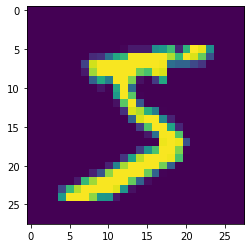

In [18]:
plt.imshow(x_train[0])

In [19]:
# Check format of y
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Preprocessing

In [20]:
# Convert y to catergorical
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [21]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
# Check intensity values
print(x_train.min(), x_train.max())

0 255


In [23]:
# Scale the intensity values
x_train = x_train/255
x_test = x_test/255

print(x_train.min(), x_train.max())

0.0 1.0


In [24]:
# Check the shape of the data
x_train.shape

(60000, 28, 28)

In [25]:
# Reshape to (samples, width, height, no. channels)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Defining the model

In [26]:
# Import tensorflow modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [28]:
# Define the model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# Implement early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=1)

Training

In [30]:
# Fit model
model.fit(x=x_train, y=y_cat_train, batch_size=100, epochs=30, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/30
600/600 [==============================] - 33s 54ms/step - loss: 0.1838 - accuracy: 0.9448 - val_loss: 0.0464 - val_accuracy: 0.9860
Epoch 2/30
600/600 [==============================] - 31s 51ms/step - loss: 0.0496 - accuracy: 0.9847 - val_loss: 0.0371 - val_accuracy: 0.9876
Epoch 3/30
600/600 [==============================] - 32s 53ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0352 - val_accuracy: 0.9891
Epoch 4/30
600/600 [==============================] - 31s 51ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0320 - val_accuracy: 0.9894
Epoch 5/30
600/600 [==============================] - 31s 52ms/step - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0312 - val_accuracy: 0.9911
Epoch 6/30
600/600 [==============================] - 30s 50ms/step - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.0321 - val_accuracy: 0.9902


In [31]:
# Collect training history
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

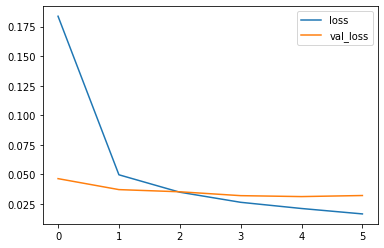

In [33]:
metrics[['loss', 'val_loss']].plot()

Prediction & Evaluation

In [35]:
# Make predictions
predictions = np.argmax(model.predict(x_test), axis=1)

In [37]:
# Import evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [39]:
print(confusion_matrix(y_test, predictions))

[[ 979    0    0    0    0    0    0    0    0    1]
 [   0 1133    1    0    0    0    0    1    0    0]
 [   1    0 1025    0    2    0    0    3    1    0]
 [   0    0    1 1005    0    3    0    0    0    1]
 [   0    0    1    0  977    0    1    0    0    3]
 [   2    0    0   10    0  875    1    1    0    3]
 [   3    2    0    1    2    5  944    0    1    0]
 [   0    1    7    0    0    0    0 1018    0    2]
 [   3    0    2    1    4    1    0    2  947   14]
 [   0    1    0    0    6    1    1    1    0  999]]


In [40]:
# Save model
from tensorflow.keras.models import save_model

save_model(model, 'MNIST_CNN.h5')

In [46]:
predict_one = model.predict(x_test[0].reshape(1,28,28,1))
predict_one = np.argmax(predict_one, axis=1)
print(predict_one)

[7]


In [45]:
y_test[0]

7

In [47]:
df = pd.DataFrame({'Labels':y_test, 'Predictions':predictions})

In [49]:
df.head(20)

,Labels,Predictions
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9
